In [3]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached h5py-3.12.1-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-0.4.1-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### <b>Звгрузка датасета:</b>

In [67]:
df = pd.read_csv("ТИУ Бакалавриат Абитуриенты Processed.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head(5)

,year,gender,gpa,points,result,direction_01.03.02 Прикладная математика и информатика,direction_02.03.01 Математика и компьютерные науки,direction_05.03.01 Геология,direction_08.03.01 Строительство,direction_08.05.00 Техника и технологии строительства,...,direction_27.03.02 Управление качеством,direction_27.03.03 Системный анализ и управление,direction_27.03.04 Управление в технических системах,direction_27.03.05 Инноватика,direction_28.03.03 Наноматериалы,direction_41.03.06 Публичная политика и социальные науки,direction_43.03.00 Сервис и туризм,direction_43.03.01 Сервис,direction_43.03.03 Гостиничное дело,direction_45.03.04 Интеллектуальные системы в гуманитарной сфере
0,0,1,3.733,173.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,3.314,148.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,4.333,196.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,4.667,222.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,4.667,220.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <b>Разделение на тренировочную и тестовую выборку:</b>

In [68]:
X = df.drop("result", axis=1)
y = df["result"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

### <b>Масштабирование входных данных:</b>

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### <b>Архитектура ML модели:</b>

In [71]:
import keras

In [72]:
model = keras.Sequential()
model.add(
    keras.layers.Dense(
        units=16, 
        activation="relu", 
        input_shape=(X_train.shape[1],)
    )
)
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation="sigmoid"))

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC()
    ]
)

### <b>Обучение ML модели</b>:

In [74]:
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6679 - auc: 0.6899 - loss: 0.6147 - precision: 0.5850 - recall: 0.3836 - val_accuracy: 0.7390 - val_auc: 0.8188 - val_loss: 0.5014 - val_precision: 0.6580 - val_recall: 0.6222
Epoch 2/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7351 - auc: 0.8033 - loss: 0.5199 - precision: 0.6732 - recall: 0.6153 - val_accuracy: 0.7376 - val_auc: 0.8266 - val_loss: 0.4792 - val_precision: 0.6497 - val_recall: 0.6401
Epoch 3/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7408 - auc: 0.8236 - loss: 0.4938 - precision: 0.6759 - recall: 0.6088 - val_accuracy: 0.7420 - val_auc: 0.8366 - val_loss: 0.4658 - val_precision: 0.6533 - val_recall: 0.6537
Epoch 4/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7498 - auc: 0.8324 - loss: 0.4809 - precision: 0.6855 - recall: 0.6251 - val_accuracy: 0.7466 - val_auc: 0.8390 - val_loss: 0.4609 - val_precision: 0.6658 - val_recall: 0.6407
Epoch 5/10
544/544 ━━━━━━━━━━━━━

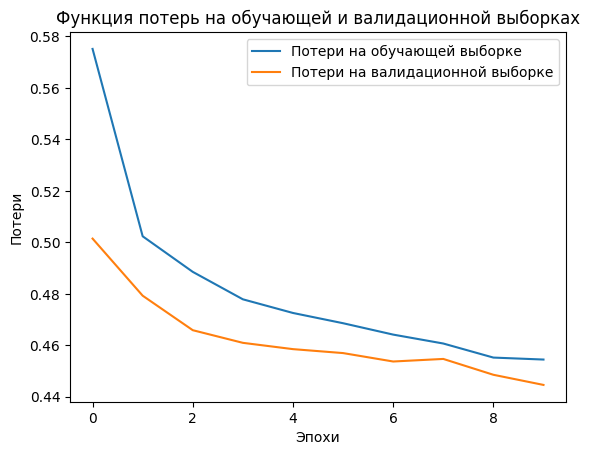

In [75]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(train_loss))

plt.figure()
plt.plot(epochs, train_loss, label='Потери на обучающей выборке')
plt.plot(epochs, val_loss, label='Потери на валидационной выборке')
plt.title('Функция потерь на обучающей и валидационной выборках')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()